<a href="https://colab.research.google.com/github/antussa2016/spam_sms_detection/blob/master/spam_sms_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/spam.csv",encoding="ISO-8859-1")


In [24]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
788,spam,"5 Free Top Polyphonic Tones call 087018728737,...",NaN,NaN,NaN
2395,ham,"Babe, I'm back ... Come back to me ...",NaN,NaN,NaN
4753,ham,Ok lor... Or u wan me go look 4 u?,NaN,NaN,NaN
259,ham,IÛ÷m parked next to a MINI!!!! When are you c...,NaN,NaN,NaN
1556,ham,Good sleep is about rhythm. The person has to ...,NaN,NaN,NaN


In [25]:
df.shape

(5572, 5)

In [ ]:
# 1. data_cleaning
# 2. EDA
# 3. text_preprocessing
# 4. model building
# 5. evaluation
# 6. improvement
# 7. convert to a website


# **Data cleaning**

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [30]:
df.drop(columns = ['Unnamed: 2','Unnamed: 3','Unnamed: 4'], inplace= True)

In [35]:
# renaming the cols
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [36]:
df.sample(5)

,target,text
1015,ham,"Dear,regret i cudnt pick call.drove down frm c..."
3605,ham,"That means you got an A in epi, she.s fine. Sh..."
2415,ham,Huh means computational science... Y they like...
2313,ham,So what do you guys do.
743,ham,Ok. There may be a free gym about.


In [37]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [38]:
df['target'] = encoder.fit_transform(df['target'])

In [39]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [40]:
# missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [41]:
# check for duplicate values
df.duplicated().sum()

403

In [43]:
# remove duplicates
df = df.drop_duplicates(keep='first')

In [44]:
df.duplicated().sum()

0

In [45]:
df.shape

(5169, 2)

# **EDA**

In [46]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [47]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

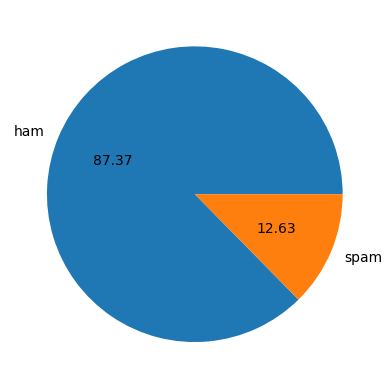

In [48]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [ ]:
# Data is imbalanced

In [54]:
import nltk

In [55]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [56]:
df['num_characters'] = df['text'].apply(len)

In [57]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [58]:
# num of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [59]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [60]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [61]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [62]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [63]:
# ham
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [64]:
#spam
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [65]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

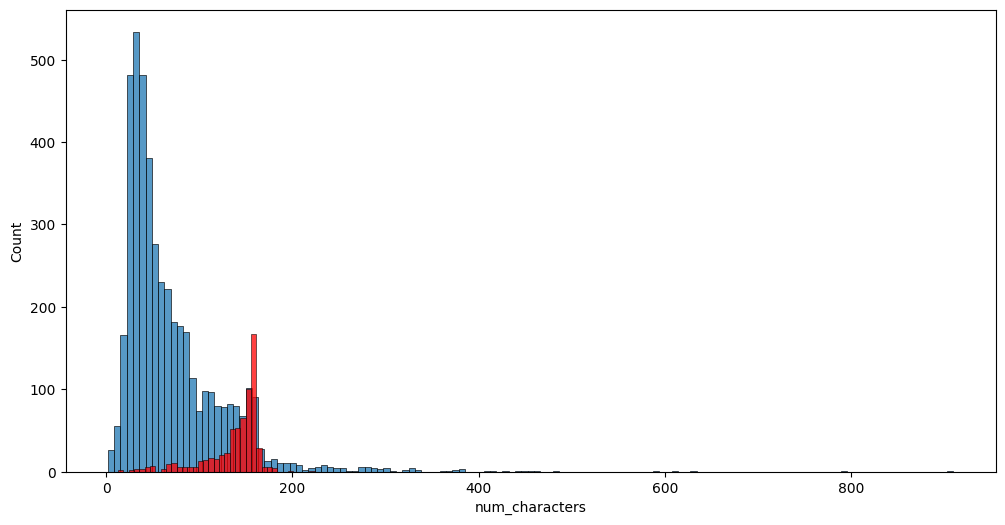

In [66]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

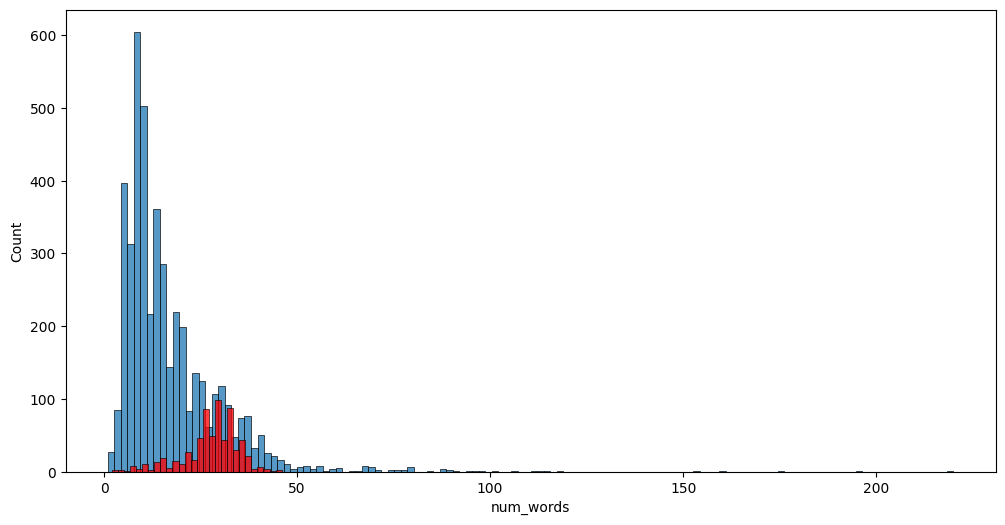

In [67]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

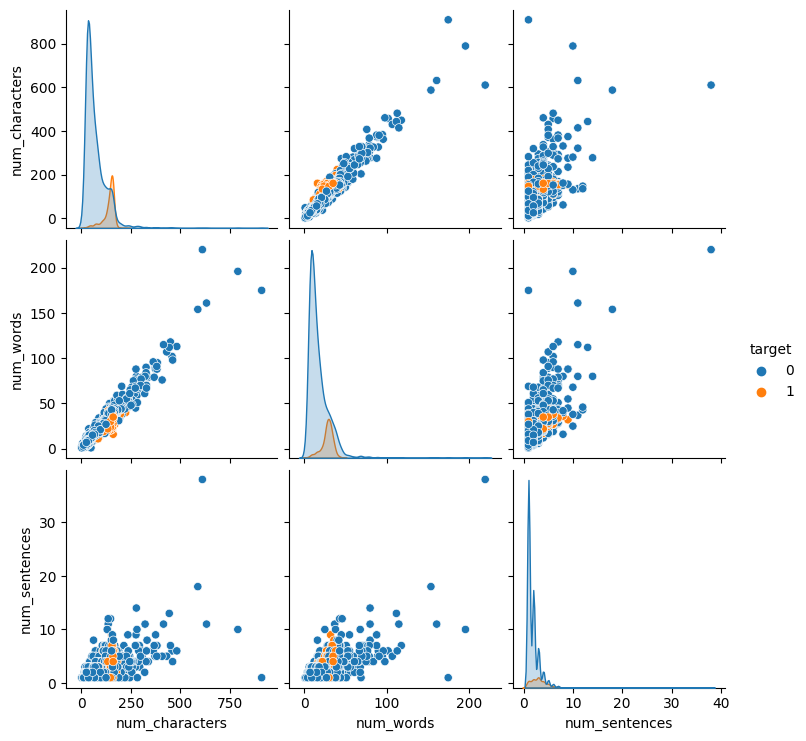

In [68]:
sns.pairplot(df,hue='target')

<ipython-input-69-8df7bcac526d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

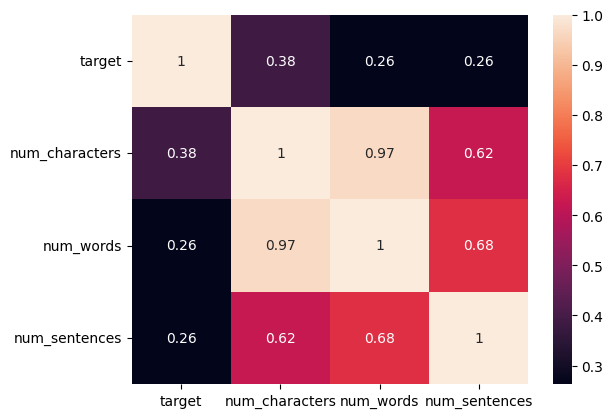

In [69]:
sns.heatmap(df.corr(),annot=True)

# **Data Preprocessing**
Lower case

Tokenization

Removing special characters

Removing stop words and punctuation

Stemming

In [77]:
nltk.download('stopwords')
from nltk.corpus import stopwords
import string
from nltk.stem import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [78]:


ps = PorterStemmer()

def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))


    return " ".join(y)

In [79]:
df['transformed_text'] = df['text'].apply(transform_text)

In [80]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [81]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='black')

In [82]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

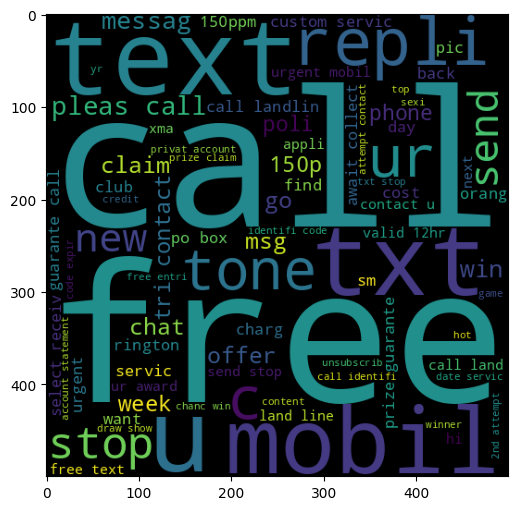

In [83]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [84]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

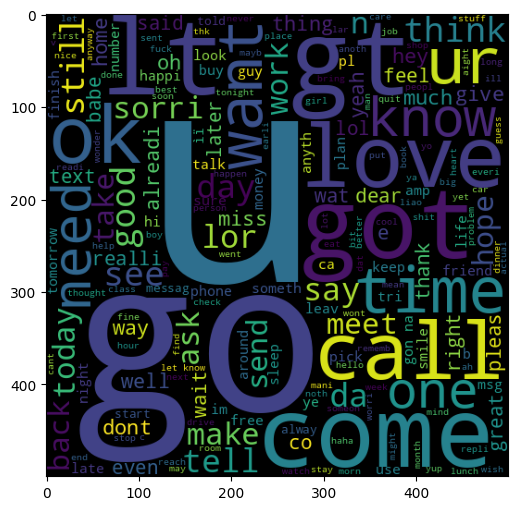

In [85]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [86]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [87]:
len(spam_corpus)

9939

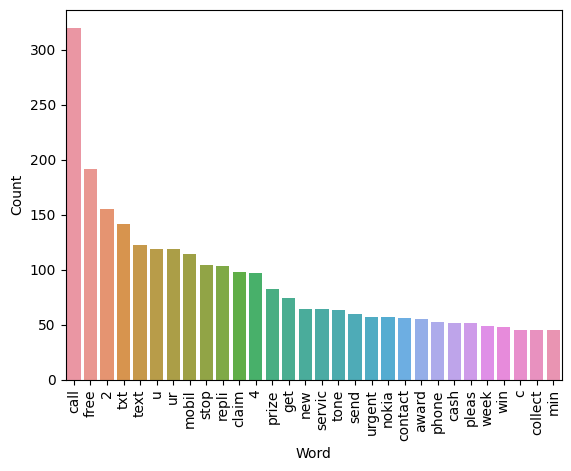

In [96]:
from collections import Counter
word_counts = Counter(spam_corpus)

# Get the most common 30 words and their counts
most_common_words = word_counts.most_common(30)

# Create a DataFrame from the most common words and counts
most_common_df = pd.DataFrame(most_common_words, columns=['Word', 'Count'])

# Create the bar plot using Seaborn
sns.barplot(data=most_common_df, x='Word', y='Count')
#sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()


In [97]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [98]:
len(ham_corpus)

35404

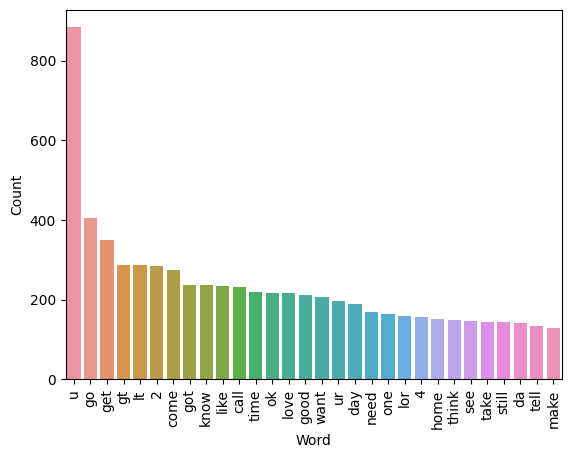

In [99]:
from collections import Counter
word_counts = Counter(ham_corpus)

# Get the most common 30 words and their counts
most_common_words = word_counts.most_common(30)

# Create a DataFrame from the most common words and counts
most_common_df = pd.DataFrame(most_common_words, columns=['Word', 'Count'])

# Create the bar plot using Seaborn
sns.barplot(data=most_common_df, x='Word', y='Count')
#sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [100]:
# Text Vectorization
# using Bag of Words
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


# **Model Building**

In [101]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [102]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [103]:
X.shape

(5169, 3000)

In [104]:
y = df['target'].values

In [105]:
from sklearn.model_selection import train_test_split

In [106]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [107]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [108]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()